In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Lets define two variables 'a' and 'b' that are perfectly correlated with each other
a = np.random.randn(100, 1)
b = 0.3 * a

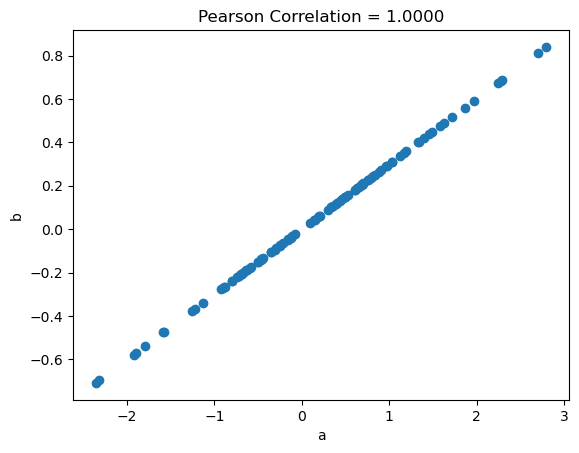

In [3]:
# Let's plot this two variables against each other
# Scatter plot
plt.scatter(a, b, marker='o')

# Set labels and title
plt.xlabel('a')
plt.ylabel('b')
correlation = np.corrcoef(a.squeeze(), b.squeeze())[0, 1]
plt.title(f"Pearson Correlation = {correlation:.4f}")

plt.show()

In [4]:
# lets assume we run 50 trials
nrTrials = 50

# Initialize the variable
b_noisy = np.empty((100, nrTrials))
b_noisy[:] = np.nan  # fill the entire array with NaNs

for i in range(nrTrials):
    # In each trial we get the real 'b' plus some noise
    b_noisy[:, i] = b.squeeze() + 0.3 * np.random.randn(100)

avg_b_noisy = np.mean(b_noisy, axis=1)


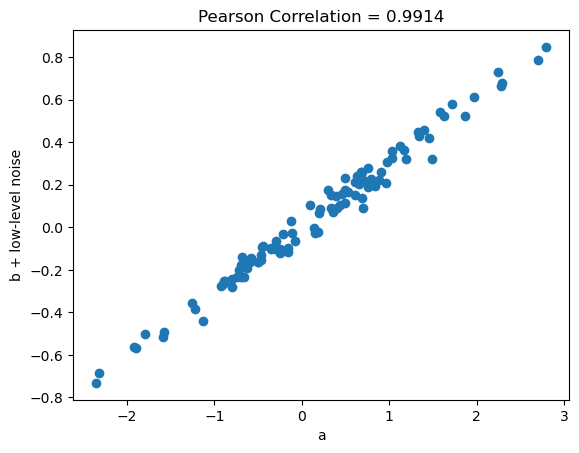

In [5]:

# Scatter plot
plt.scatter(a, avg_b_noisy, marker='o')

# Set labels and title
plt.xlabel('a')
plt.ylabel('b + low-level noise')
correlation = np.corrcoef(a.squeeze(), avg_b_noisy)[0, 1]
plt.title(f"Pearson Correlation = {correlation:.4f}")

plt.show()


In [6]:
# Add more noise

for i in range(nrTrials):
    # In each trial we get the real 'b' plus some noise
    b_noisy[:, i] = b.squeeze() + 1.3 * np.random.randn(100)

avg_b_noisy = np.mean(b_noisy, axis=1)


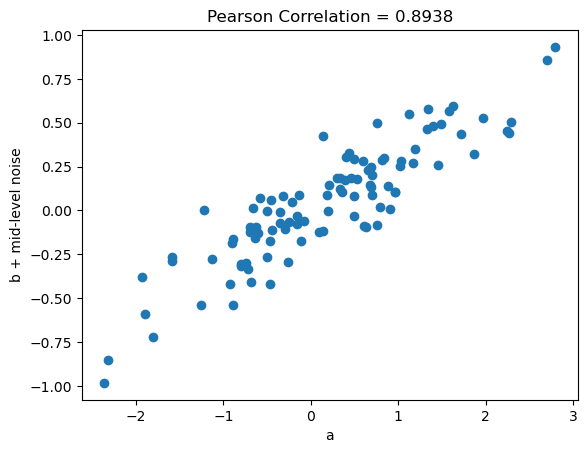

In [7]:

# Scatter plot
plt.scatter(a, avg_b_noisy, marker='o')

# Set labels and title
plt.xlabel('a')
plt.ylabel('b + mid-level noise')
correlation = np.corrcoef(a.squeeze(), avg_b_noisy)[0, 1]
plt.title(f"Pearson Correlation = {correlation:.4f}")

plt.show()

In [8]:
# Add more noise

for i in range(nrTrials):
    # In each trial we get the real 'b' plus some noise
    b_noisy[:, i] = b.squeeze() + 1.8 * np.random.randn(100)

avg_b_noisy = np.mean(b_noisy, axis=1)


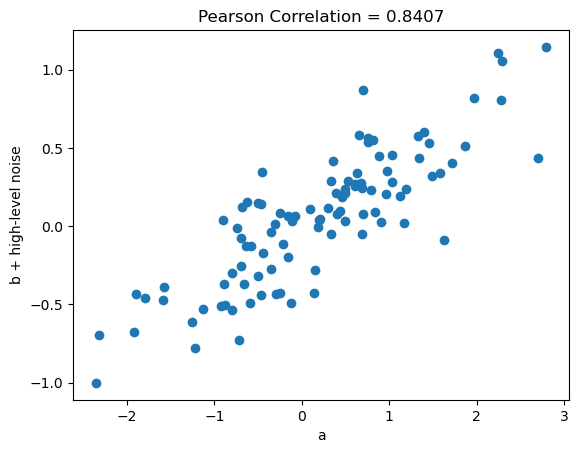

In [9]:
# Scatter plot
plt.scatter(a, avg_b_noisy, marker='o')

# Set labels and title
plt.xlabel('a')
plt.ylabel('b + high-level noise')
correlation = np.corrcoef(a.squeeze(), avg_b_noisy)[0, 1]
plt.title(f"Pearson Correlation = {correlation:.4f}")

plt.show()

In [10]:
# Let's make a new variable that is not fully correlated with 'a'

c = 0.3 * a + 0.15*np.random.randn(100, 1)


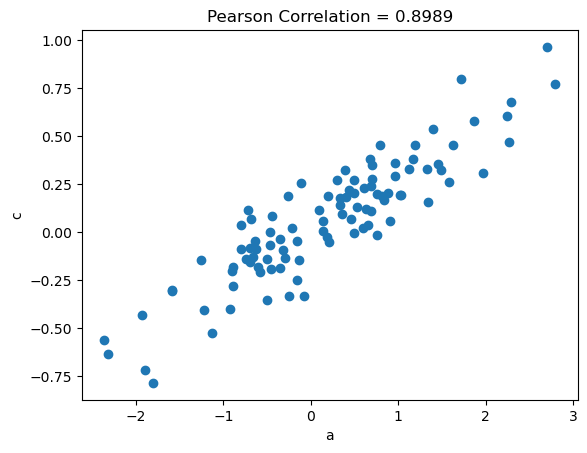

In [11]:
# Scatter plot
plt.scatter(a, c, marker='o')

# Set labels and title
plt.xlabel('a')
plt.ylabel('c')
correlation = np.corrcoef(a.squeeze(), c.squeeze())[0, 1]
plt.title(f"Pearson Correlation = {correlation:.4f}")

plt.show()

In [12]:
# lets assume we run 50 trials
nrTrials = 50

# Initialize the variable
c_noisy = np.empty((100, nrTrials))
c_noisy[:] = np.nan  # fill the entire array with NaNs

for i in range(nrTrials):
    # In each trial we get the real 'b' plus some noise
    c_noisy[:, i] = c.squeeze() + 0.3 * np.random.randn(100)

avg_c_noisy = np.mean(c_noisy, axis=1)

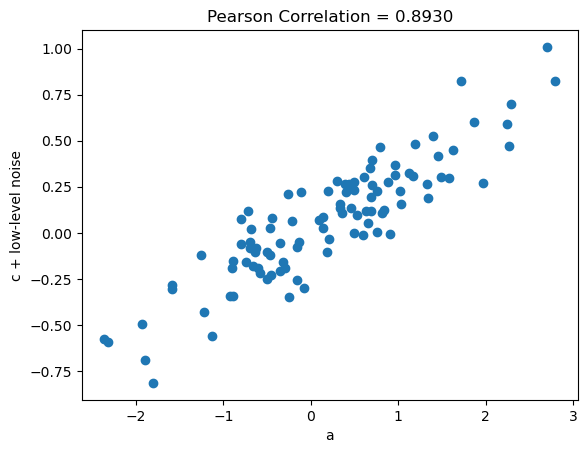

In [13]:
# Scatter plot
plt.scatter(a, avg_c_noisy, marker='o')

# Set labels and title
plt.xlabel('a')
plt.ylabel('c + low-level noise')
correlation = np.corrcoef(a.squeeze(), avg_c_noisy)[0, 1]
plt.title(f"Pearson Correlation = {correlation:.4f}")

plt.show()

In [14]:
print(f"size of a = {a.shape}")
print(f"size of b_noisy = {b_noisy.shape}")
print(f"size of c_noisy = {c_noisy.shape}")

size of a = (100, 1)
size of b_noisy = (100, 50)
size of c_noisy = (100, 50)


In [15]:
nrBS = 1000
nrTrials = 50

sh_reliability_b = np.empty(nrBS)
sh_reliability_b[:] = np.nan

sh_reliability_c = np.empty(nrBS)
sh_reliability_c[:] = np.nan

for i in range(nrBS):
    l1 = np.random.choice(nrTrials, int(nrTrials/2), replace=False)
    l2 = np.setdiff1d(np.arange(nrTrials), l1)

    b_sh1 = np.mean(b_noisy[:, l1], axis=1)
    b_sh2 = np.mean(b_noisy[:, l2], axis=1)

    c_sh1 = np.mean(c_noisy[:, l1], axis=1)
    c_sh2 = np.mean(c_noisy[:, l2], axis=1)

    # Calculate correlation
    r_b = np.corrcoef(b_sh1, b_sh2)[0, 1]
    sh_reliability_b[i] = 2 * r_b / (1 + r_b) # Spearman Brown correction to correct for splits

    r_c = np.corrcoef(c_sh1, c_sh2)[0, 1]
    sh_reliability_c[i] = 2 * r_c / (1 + r_c) # Spearman Brown correction to correct for splits


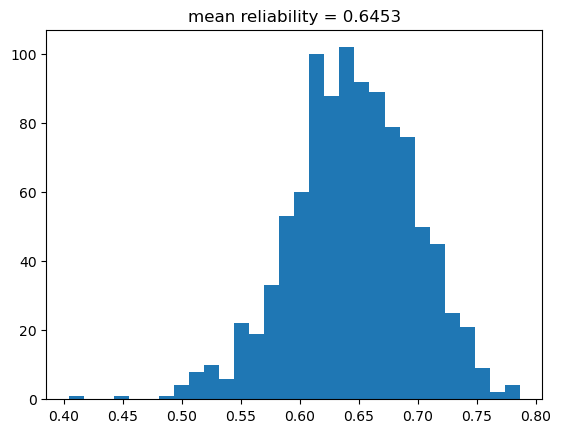

In [16]:

# Plot histogram
plt.hist(sh_reliability_b, bins=30)

# Set title with mean reliability
plt.title(f"mean reliability = {np.mean(sh_reliability_b):.4f}")

plt.show()


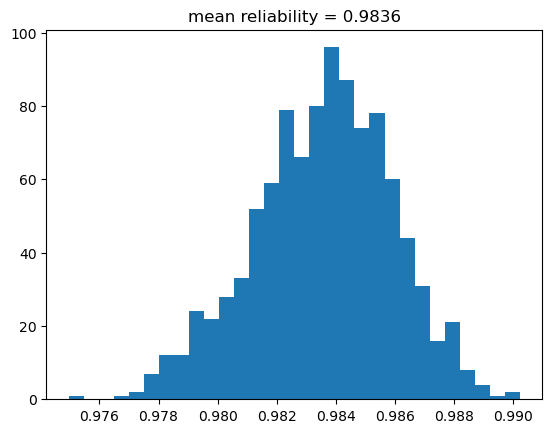

In [17]:
# Plot histogram
plt.hist(sh_reliability_c, bins=30)

# Set title with mean reliability
plt.title(f"mean reliability = {np.mean(sh_reliability_c):.4f}")

plt.show()

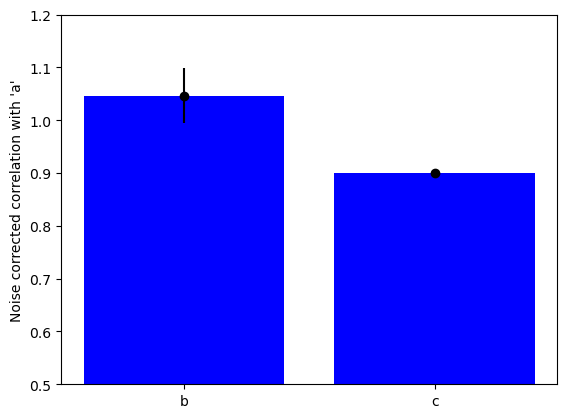

In [18]:

# Correct the correlations
b_corr = np.corrcoef(a.squeeze(), avg_b_noisy)[0, 1] / np.sqrt(np.mean(sh_reliability_b))
c_corr = np.corrcoef(a.squeeze(), avg_c_noisy)[0, 1] / np.sqrt(np.mean(sh_reliability_c))

# Plot bar chart
means = [b_corr, c_corr]
std_devs = [np.std(sh_reliability_b), np.std(sh_reliability_c)]
positions = [1, 2]
plt.bar(positions, means, color='blue')

# Overlay error bars
plt.errorbar(positions, means, yerr=std_devs, fmt='ko', capsize=0)

# Label y-axis and set x-tick labels
plt.ylabel('Noise corrected correlation with \'a\'')
plt.xticks(positions, ['b', 'c'])
plt.ylim(0.5,1.2)
plt.show()

In [19]:

# Let's vary the number of trials recorded and ask how does the measured reliability vary

nrTrials = [10, 20, 30, 40, 50, 60, 70, 80]
nrBS = 100

sh_reliability_b = np.empty((nrBS, len(nrTrials)))
sh_reliability_b[:] = np.nan

for j, trials in enumerate(nrTrials):

    # Create noisy 'b' for current number of trials
    b_noisy = np.empty((100, trials))
    b_noisy[:] = np.nan

    for i in range(trials):
        b_noisy[:, i] = b.squeeze() + 1.2 * np.random.randn(100)

    # Estimate split-half reliability
    for i in range(nrBS):
        l1 = np.random.choice(trials, int(trials / 2), replace=False)
        l2 = np.setdiff1d(np.arange(trials), l1)

        b_sh1 = np.mean(b_noisy[:, l1], axis=1)
        b_sh2 = np.mean(b_noisy[:, l2], axis=1)

        r_b = np.corrcoef(b_sh1, b_sh2)[0, 1]
        sh_reliability_b[i, j] = 2 * r_b / (1 + r_b) # Spearman Brown correction to correct for splits


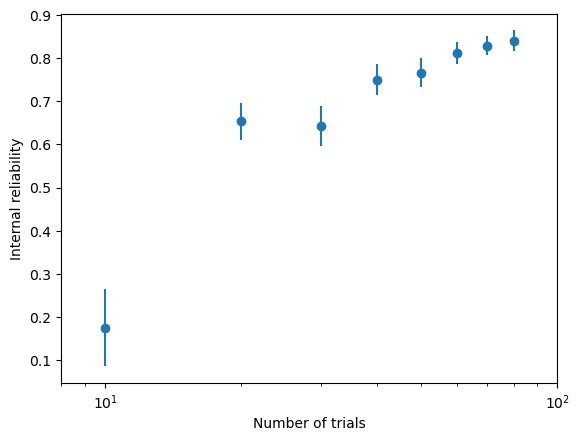

In [21]:

# Plot reliability vs. number of trials recorded... 

plt.errorbar(nrTrials, np.mean(sh_reliability_b, axis=0), np.std(sh_reliability_b, axis=0), 
             marker='o', linestyle='', capsize=0)

# Set x-axis limits

plt.xlabel('Number of trials')
plt.ylabel('Internal reliability')

ax = plt.gca()  # Get the current axes
ax.set_xscale('log')
plt.xlim([8, 100])
plt.show()